# Fund 23. Linear, Convolution Layer
- 하나의 물체가 여러 개의 논리적인 객체들로 구성되어 있는 경우, 이러한 각각의 객체를 하나의 레이어라 한다.
- 신경망은 레이어들이 각기 다른 Weight, 그것들이 유기적으로 연결되어 이뤄내는 하나의 결과물이다. 인간의 두뇌와 닮았기에 **인공 신경망**이라고 한다. 

## Linear 레이어
- Linear 레이어는 선형 변환을 활용해 데이터를 특정 차원으로 변환하는 기능을 한다. 
- 100차원의 데이터를 300차원으로 변환한다면 데이터를 더 풍부하게 하는 효과가 있고, 10차원의 데이터로 변환한다면 데이터를 집약시키는 효과가 있다. 

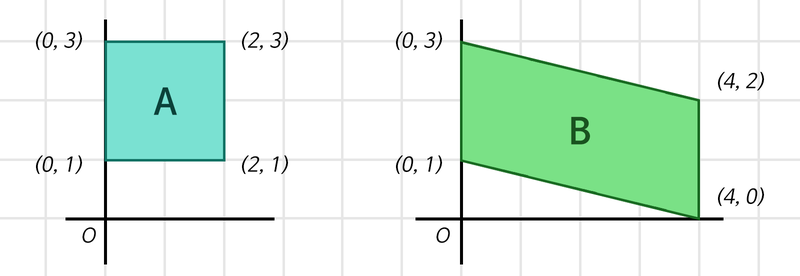  
이미치 출처 : https://lms.aiffel.io/steps2/3783

- 위 그림의 두 사각형은 2차원의 점 4개로 표현할 수 있기 때문에, 각각 (4, 2) 행렬 형태의 데이터로 표현할 수 있다. 
- 이 두 사각형을 어떤 하나의 정수로 표현하고자 할 때, 이 정수는 우리가 구분하고자 하는 사각형의 종류(class)를 의미한다. 
> 1단계 : (4, 2) x (2, 1) 행렬 = (4, )  
2단계 : (4, ) x (4 x 1) 행렬 = (1, )  

- 위 단계를 사용하면 각각의 사각형을 , 정보가 집약된 하나의 정수로 표현할 수 있다.
- 2차원을 1차원으로 변환하는 데에 (2, 1) 행렬이 하나 선언되고, 4차원을 1차원으로 변환하는 데 (4, 1) 행렬이 하나 선언됨에 유의하자. 
- 여기서 각각의 행렬들이 **Weight**다. Linear 레이어는 `(입력의 차원), (출력의 차원)`에 해당하는 Weight를 가지는 특성을 가지고 있다. 

In [1]:
import tensorflow as tf

batch_size = 64
boxes = tf.zeros((batch_size, 4, 2))  # tensorflow는 Batch를 기반으로 동작하기 때문에, 사각형 2개 세트를 batch_size만큼 만든 후 처리

print("1단계 연산 준비 : ", boxes.shape)

first_linear = tf.keras.layers.Dense(units=1, use_bias=False)
# units는 출력 차원 수를 의미
# Weight 행렬 속 실수를 인간의 뇌 속 하나의 뉴런 '유닛' 취급을 하는 것이다!

first_out = first_linear(boxes)
first_out = tf.squeeze(first_out, axis=-1)  # (4, 1) -> (4, )로 변환 (불필요한 차원 축소)

print("1단계 연산 결과 : ", first_out.shape)
print("1단계 Linear Layer의 Weight 형태 : ", first_linear.weights[0].shape)

print("\n2단계 연산 준비 : ", first_out.shape)

second_linear = tf.keras.layers.Dense(units=1, use_bias=False)
second_out = second_linear(first_out)
second_out = tf.squeeze(second_out, axis=-1)

print("2단계 연산 결과 : ", second_out.shape)
print("2단계 Linear Layer의 Weight 형태 : ", second_linear.weights[0].shape)

1단계 연산 준비 :  (64, 4, 2)
1단계 연산 결과 :  (64, 4)
1단계 Linear Layer의 Weight 형태 :  (2, 1)

2단계 연산 준비 :  (64, 4)
2단계 연산 결과 :  (64,)
2단계 Linear Layer의 Weight 형태 :  (4, 1)


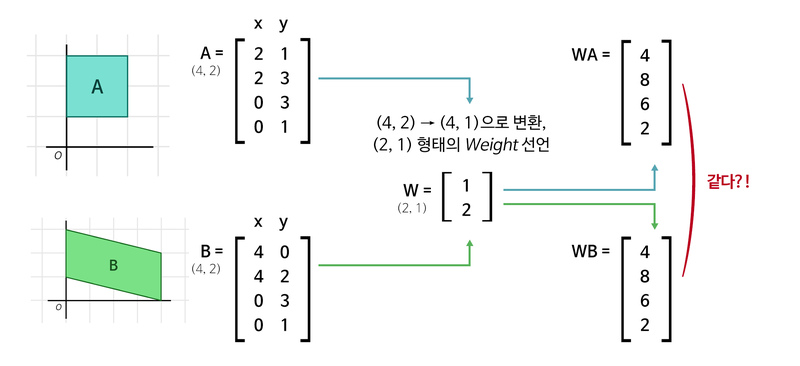  
이미지 출처 : https://lms.aiffel.io/steps2/3783

- 하지만 위 그림과 같이 두 사각형에 대해 1단계를 거친 결과가 동일하다. 이렇게 2단계의 입력이 동일해지니 두 번째 (4, 1) Weight를 거치는 것이 의미 없다.  
- 여기서 모든 Weight의 모든 요소를 **Parameter**라고 한다. 총 6개 (위 그림에서는 2개)의 Parameter로 이 문제를 해결하기에는 역부족이었다. 
- 첫 번째 접근은 데이터를 집약하는데에만 집중했으니, 이번엔 데이터를 더 풍부하게 만들어 보자. : 
> 1단계 : (4, 2) x (2 x 3) 행렬 = (4, 3)  
2단계 : (4, 3) x (3 x 1) 행렬  = (4, )  
3단계 : (4, ) x (4 x 1) 행렬 = (1, )

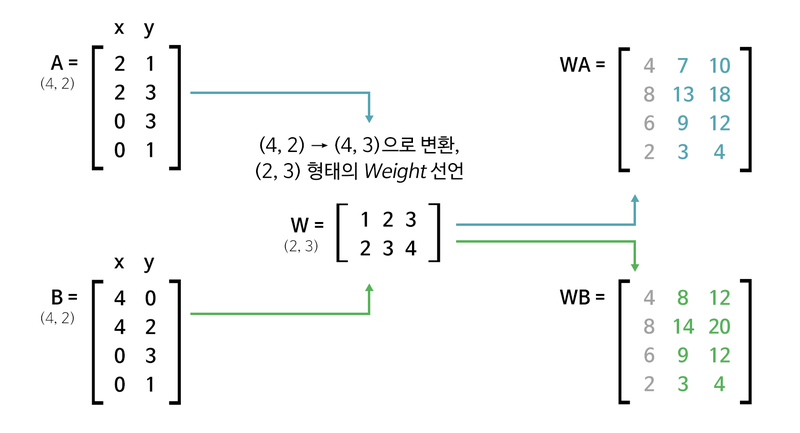  
이미지 출처 : https://lms.aiffel.io/steps2/3783

In [2]:
import tensorflow as tf

batch_size = 64
boxes = tf.zeros((batch_size, 4, 2))

print("1단계 연산 준비:", boxes.shape)

first_linear = tf.keras.layers.Dense(units=3, use_bias=False)
first_out = first_linear(boxes)

print("1단계 연산 결과:", first_out.shape)
print("1단계 Linear Layer의 Weight 형태:", first_linear.weights[0].shape)

print("\n2단계 연산 준비:", first_out.shape)

second_linear = tf.keras.layers.Dense(units=1, use_bias=False)
second_out = second_linear(first_out)
second_out = tf.squeeze(second_out, axis=-1)

print("2단계 연산 결과:", second_out.shape)
print("2단계 Linear Layer의 Weight 형태:", second_linear.weights[0].shape)

print("\n3단계 연산 준비:", second_out.shape)

third_linear = tf.keras.layers.Dense(units=1, use_bias=False)
third_out = third_linear(second_out)
third_out = tf.squeeze(third_out, axis=-1)

print("3단계 연산 결과:", third_out.shape)
print("3단계 Linear Layer의 Weight 형태:", third_linear.weights[0].shape)

total_params = \
first_linear.count_params() + \
second_linear.count_params() + \
third_linear.count_params()

print("총 Parameters:", total_params)

1단계 연산 준비: (64, 4, 2)
1단계 연산 결과: (64, 4, 3)
1단계 Linear Layer의 Weight 형태: (2, 3)

2단계 연산 준비: (64, 4, 3)
2단계 연산 결과: (64, 4)
2단계 Linear Layer의 Weight 형태: (3, 1)

3단계 연산 준비: (64, 4)
3단계 연산 결과: (64,)
3단계 Linear Layer의 Weight 형태: (4, 1)
총 Parameters: 13


- 지나치게 많은 Parameter는 과적합(Overfitting)을 야기한다. 
- 이렇게 Weight의 형태만 선언해주면 그 파라미터 값을 임의의 실수가 채우고, 수많은 데이터를 거치며 가장 적합한 Weight를 알아서 찾아가는 과정이 **훈련(Training)**이다. 

## Convolution 레이어

In [3]:
import tensorflow as tf

batch_size = 64
pic = tf.zeros((batch_size, 1920, 1080, 3))

print("입력 이미지 데이터 : ", pic.shape)
conv_layer = tf.keras.layers.Conv2D(filters=16, 
                                   kernel_size=(5, 5),
                                   strides=5, 
                                   use_bias=False)

conv_out = conv_layer(pic)

print("\nConvolution의 결과 : ", conv_out.shape)
print("Convolution Layer의 Parameter 수 : ", conv_layer.count_params())

flatten_out = tf.keras.layers.Flatten()(conv_out)
print("\n1차원으로 펼친 데이터 : ", flatten_out.shape)

linear_layer = tf.keras.layers.Dense(units=1, use_bias=False)
linear_out = linear_layer(flatten_out)

print("\nLinear 결과 : ", linear_out.shape)
print("Linear Layer의 Parameter 수 : ", linear_layer.count_params())

입력 이미지 데이터 :  (64, 1920, 1080, 3)

Convolution의 결과 :  (64, 384, 216, 16)
Convolution Layer의 Parameter 수 :  1200

1차원으로 펼친 데이터 :  (64, 1327104)

Linear 결과 :  (64, 1)
Linear Layer의 Parameter 수 :  1327104


## Pooling 레이어
- Max Pooling 레이어를 통해 효과적으로 Receptive Field를 키우고, 정보 집약 효과를 극대화할 수 있었다. 이 동안 늘어난 파라미터 사이즈는 0이다. 
- translational invariance 효과 : 이미지는 약간의 상하좌우 시프트가 생긴다고 해도 내용상 동일한 특징이 있는데, Max Pooling을 통해 인접한 영역 중 가장 특징이 두드러진 영역 하나를 뽑는 것은 오히려 약간의 시프트 효과에도 불구하고 동일한 특징을 안정적으로 잡아낼 수 있는 긍정적 효과가 있어서 오히려 object 위치에 대한 오버피팅을 방지하고 안정적인 특징 추출 효과를 가져온다고 한다. 
- Non-linear 함수와 동일한 피처 추출 효과 : ReLu와 같은 Non-linear 함수도 마찬가지로 많은 하위 레이어의 연산 결과를 무시하는 효과를 발생시키지만, 그 결과 중요한 피처만을 상위 레이어로 추출해 올려줌으로써 결과적으로 분류기의 성능을 증진시키는 효과를 가진다. Min/Max Pooling도 이와 동일한 효과를 갖는다. 
- Receptive Field 극대화 효과 : Max Pooing 없이 Receptive Field를 크게 하려면 Convolutional 레이어를 아주 많이 쌓아야 한다. 그 결과 큰 파라미터 사이즈로 인한 오버피팅, 연산량 증가, Gradient Vanishing 등의 문제를 감수해야 한다. 

## Deconvolution 레이어
Convolution의 결과를 역재생해서 원본 이미지와 최대한 유사한 정보를 복원해내는 Auto Encoder에 대해 알아보자.
- 패키지 임포트 및 MNIST 데이터셋 로딩
- AutoEncoder 모델 구성
- AutoEncoder 모델 훈련
- AutoEncoder Reconstruction Test

In [4]:
import numpy as np
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import json
import matplotlib.pyplot as plt

# MNIST 데이터셋 로드
(x_train, _), (x_test, _) = mnist.load_data()  # y_train, y_test는 사용하지 않는다. 

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

- y_train, y_test는 사용하지 않는다. AutoEncoder가 수행하는 Image Reconstruction Task는 x_train의 라벨이 바로 x_train 자신이기 때문. 

In [5]:
# AutoEncoder 모델 구성 - Input 부분
input_shape = x_train.shape[1:]
input_img = Input(shape=input_shape)

# AutoEncoder 모델 구성 - Encoder 부분
encode_conv_layer_1 = Conv2D(16, (3, 3), activation='relu', padding='same')
encode_pool_layer_1 = MaxPooling2D((2, 2), padding='same')
encode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu', padding='same')
encode_pool_layer_2 = MaxPooling2D((2, 2), padding='same')
encode_conv_layer_3 = Conv2D(4, (3, 3), activation='relu', padding='same')
encode_pool_layer_3 = MaxPooling2D((2, 2), padding='same')

encoded = encode_conv_layer_1(input_img)
encoded = encode_pool_layer_1(encoded)
encoded = encode_conv_layer_2(encoded)
encoded = encode_pool_layer_2(encoded)
encoded = encode_conv_layer_3(encoded)
encoded = encode_pool_layer_3(encoded)

# AutoEncoder 모델 구성 - Decoder 부분
decode_conv_layer_1 = Conv2D(4, (3, 3), activation='relu', padding='same')
decode_upsample_layer_1 = UpSampling2D((2, 2))
decode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu', padding='same')
decode_upsample_layer_2 = UpSampling2D((2, 2))
decode_conv_layer_3 = Conv2D(16, (3, 3), activation='relu')
decode_upsample_layer_3 = UpSampling2D((2, 2))
decode_conv_layer_4 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')

decoded = decode_conv_layer_1(encoded)   # Decoder는 Encoder의 출력을 입력으로 받는다. 
decoded = decode_upsample_layer_1(decoded)
decoded = decode_conv_layer_2(decoded)
decoded = decode_upsample_layer_2(decoded)
decoded = decode_conv_layer_3(decoded)
decoded = decode_upsample_layer_3(decoded)
decoded = decode_conv_layer_4(decoded)

# AutoEncoder 모델 정의
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 4)           292       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 4)           0     

In [6]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 9ms/step - loss: 0.7084 - val_loss: 0.7071
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.7059 - val_loss: 0.7046
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.7034 - val_loss: 0.7022
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.7011 - val_loss: 0.7000
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6989 - val_loss: 0.6979
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6970 - val_loss: 0.6960
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6951 - val_loss: 0.6942
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6934 - val_loss: 0.6925
Epoch 9/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6917 - val_loss: 0.6908
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6900 - val_loss: 0.6891

- y_train이 들어가야할 자리에 x_train이 들어가있음에 유의하자. 
- loss로 분류 모델에서 사용되는 `binary_crossentropy`를 사용한 것이 의아할 수 있다. 그러나 모든 dim에서 0~1 사이의 값을 갖는 입력 데이터와 출력 데이터(마지막 출력이 sigmoid로 제어되고 있음에 유의) 사이의 분포가 최대한 유사하기를 바라기 때문에 이 loss는 타당하다. 

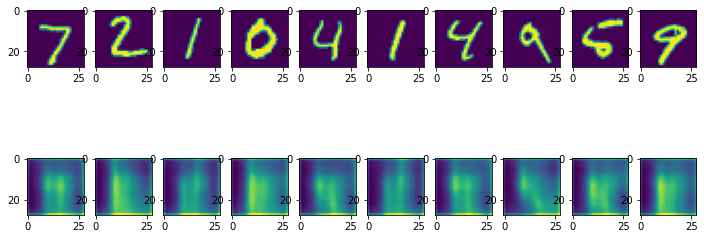

In [7]:
x_test_10 = x_test[:10]       # 테스트 데이터셋에서 10개만 골라서
x_test_hat = autoencoder.predict(x_test_10)    # AutoEncoder 모델의 이미지 복원생성
x_test_imgs = x_test_10.reshape(-1, 28, 28)
x_test_hat_imgs = x_test_hat.reshape(-1, 28, 28)

plt.figure(figsize=(12,5))  # 이미지 사이즈 지정
for i in range(10):  
    # 원본이미지 출력
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_imgs[i])
    # 생성된 이미지 출력
    plt.subplot(2, 10, i+11)
    plt.imshow(x_test_hat_imgs[i])

- 결과가 썩 만족스럽지는 않다. 이것은 Decoder 네트워크 구조만의 문제는 아닐 것이다. 

### Transposed Convolutoin

In [8]:
from tensorflow.keras.layers import Conv2DTranspose

# Conv2DTranspose를 활용한  AutoEncoder 모델
# AutoEncoder 모델 구성 - Input 부분
input_shape = x_train.shape[1:]
input_img = Input(shape=input_shape)

# AutoEncoder 모델 구성 - Encoder 부분
encode_conv_layer_1 = Conv2D(16, (3, 3), activation='relu')
encode_pool_layer_1 = MaxPooling2D((2, 2))
encode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu')
encode_pool_layer_2 = MaxPooling2D((2, 2))
encode_conv_layer_3 = Conv2D(4, (3, 3), activation='relu')

encoded = encode_conv_layer_1(input_img)
encoded = encode_pool_layer_1(encoded)
encoded = encode_conv_layer_2(encoded)
encoded = encode_pool_layer_2(encoded)
encoded = encode_conv_layer_3(encoded)

# AutoEncoder 모델 구성 - Decoder 부분  - 
decode_conv_layer_1 = Conv2DTranspose(4, (3, 3), activation='relu', padding='same')
decode_upsample_layer_1 = UpSampling2D((2, 2))
decode_conv_layer_2 = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')
decode_upsample_layer_2 = UpSampling2D((2, 2))
decode_conv_layer_3 = Conv2DTranspose(16, (3, 3), activation='relu')
decode_upsample_layer_3 = UpSampling2D((2, 2))
decode_conv_layer_4 = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')

decoded = decode_conv_layer_1(encoded)   # Decoder는 Encoder의 출력을 입력으로 받습니다.
decoded = decode_upsample_layer_1(decoded)
decoded = decode_conv_layer_2(decoded)
decoded = decode_upsample_layer_2(decoded)
decoded = decode_conv_layer_3(decoded)
decoded = decode_upsample_layer_3(decoded)
decoded = decode_conv_layer_4(decoded)

# AutoEncoder 모델 정의
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 8)         1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 4)           292       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 3, 3, 4)           148 

In [9]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 8ms/step - loss: 0.6925 - val_loss: 0.6921
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.6917 - val_loss: 0.6913
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.6907 - val_loss: 0.6902
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.6896 - val_loss: 0.6891
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.6883 - val_loss: 0.6876
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.6867 - val_loss: 0.6859
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.6848 - val_loss: 0.6838
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.6824 - val_loss: 0.6811
Epoch 9/50
235/235 [==============================] - 1s 6ms/step - loss: 0.6793 - val_loss: 0.6777
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss: 0.6752 - val_loss: 0.6730

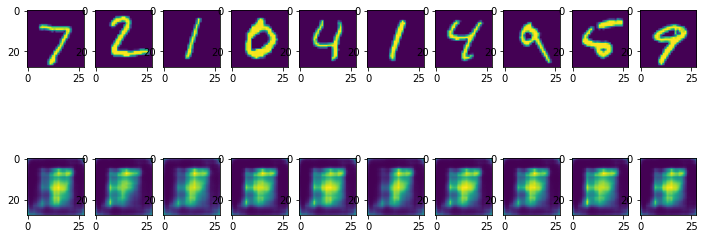

In [10]:
x_test_10 = x_test[:10]       # 테스트 데이터셋에서 10개만 골라서
x_test_hat = autoencoder.predict(x_test_10)    # AutoEncoder 모델의 이미지 복원생성
x_test_imgs = x_test_10.reshape(-1, 28, 28)
x_test_hat_imgs = x_test_hat.reshape(-1, 28, 28)

plt.figure(figsize=(12,5))  # 이미지 사이즈 지정
for i in range(10):  
    # 원본이미지 출력
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_imgs[i])
    # 생성된 이미지 출력
    plt.subplot(2, 10, i+11)
    plt.imshow(x_test_hat_imgs[i])